In [1]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

In [2]:
irisData = load_iris()
  
# Create feature and target arrays
X = irisData.data
y = irisData.target

In [3]:
# Split into training and test set
learn_data, test_data, learn_labels, test_labels = train_test_split(
             X, y, test_size = 0.4)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
  
knn.fit(learn_data, learn_labels)
  
# Predict on dataset which model has not seen before
yp=knn.predict(test_data)
print(knn.predict(test_data))
print(knn.score(test_data, test_labels))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_labels,yp)
print(cm)

[0 0 0 2 2 0 1 2 1 1 2 1 0 0 1 2 2 0 2 1 2 0 0 2 0 2 1 0 1 1 0 1 1 2 2 1 0
 2 2 1 2 2 1 1 2 2 2 1 0 0 0 1 2 0 1 0 0 1 1 1]
0.9666666666666667
[[19  0  0]
 [ 0 21  2]
 [ 0  0 18]]


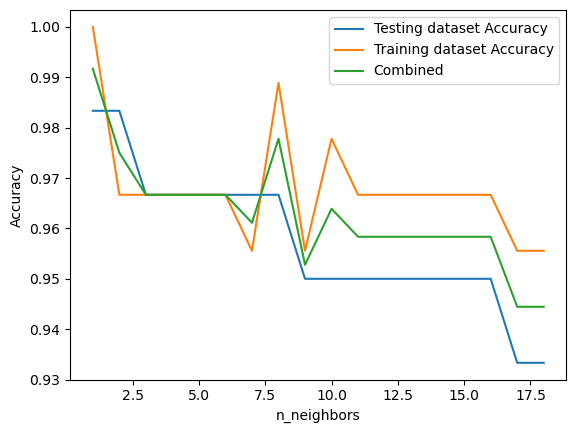

In [7]:
# Choosing the Best K-Value:
neighbors = np.arange(1, 19)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
Sum = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(learn_data, learn_labels)
      
    # Compute traning and test data accuracy
    train_accuracy[i] = knn.score(learn_data, learn_labels)
    test_accuracy[i] = knn.score(test_data, test_labels)
    Sum[i]=train_accuracy[i]+test_accuracy[i]
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.plot(neighbors, Sum/2, label = 'Combined')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()